# Extract Runoff from matlab file: problem!!! All data are nana

The data are based on this paper: https://tc.copernicus.org/articles/13/2259/2019/#section6

The digital elevation model can be accessed at https://doi.org/10.21334/npolar.2014.dce53a47 (Norwegian Polar Institute, 2014). The glacier and land masks were constructed from glacier outlines, which are available at https://doi.org/10.21334/npolar.2013.89f430f8 (König et al., 2013). The model outputs behind the presented figures of air temperature, precipitation, CMB, ELA, runoff, refreezing, T14, P14, snow onset, and disappearance dates are available in the following repository: https://doi.org/10.6084/m9.figshare.7836530.v1 (van Pelt et al., 2019). The full model dataset, of which only a selection is presented here, contains data with a 3-hourly temporal resolution and for an extended set of variables; a description of readily available data is accessible online (model output, http://www.wardvanpelt.com/model_output.txt, last access: 13 March 2019). Glacier-wide mass balances for KNG, HBR, HDF, MLB, and ABB are available in the database of the World Glacier Monitoring Service (WGMS; https://wgms.ch/, last access: 6 November 2018). Meteorological time series for Ny-Ålesund and Longyearbyen are accessible through the eKlima portal (Norwegian Meteorological Institute; http://eklima.met.no/, last access: 13 March 2019). The Kongsvegen AWS time series are also accessible at https://doi.org/10.21334/npolar.2017.5dc31930 (Kohler et al., 2017). Unrestricted access to the HIRLAM regional climate model data, point stake mass balance data, and the remaining AWS time series is provided upon request by contacting the institutes that collected/generated the data (see Sect. 2).


Runoff data availability: van Pelt, W. J. J., Pohjola, V. A., Pettersson, R., Marchenko, S., Kohler, J., Luks, B., Hagen, J. O., Schuler, T. V., Dunse, T., Noël, B., and Reijmer, C. H.: A long-term dataset of climatic mass balance, snow conditions and runoff in Svalbard (1957–2018), https://doi.org/10.6084/m9.figshare.7836530.v1, 2019. a (Raw data: https://figshare.com/articles/dataset/A_long-term_dataset_of_climatic_mass_balance_snow_conditions_and_runoff_in_Svalbard_1957-2018_/7836530/1)

# Convert .mat files into pd Dataframe

In [1]:
import numpy as np
from scipy.io import loadmat  # this is the SciPy module that loads mat-files
import matplotlib.pyplot as plt
from datetime import datetime, date, time
import pandas as pd

# Import data

In [2]:
pwd


'/home/colili/Documents/PhD/project_john/Code/data_acquisition'

In [3]:
mat_file = loadmat('/home/colili/Documents/PhD/project_john/data_set/data_thomas_ELA_beta/Runoff.mat')
mat_file_cmb = loadmat('/home/colili/Documents/PhD/project_john/data_set/data_thomas_ELA_beta/WVP_CMB_ELA_beta.mat')

runoff = mat_file['Runoff'][0][0][0][:, :, -1]
# annual_runoff = mat_file['Annual runoff (1 September - 31 August)']
X = mat_file['Runoff'][0][0][3][:, :]
Y = mat_file['Runoff'][0][0][4][:, :]
Z = mat_file_cmb['Z']
year = mat_file['Runoff'][0][0][5][:, 0]


In [4]:
# # mat_file['Runoff'].dtype
# runoff1 = mat_file['Runoff'][0][0][0][:, :, -1]
# result = runoff1[np.logical_not(np.isnan(runoff1))]
# result
# # Z.shape

In [5]:
Z.shape

(550, 468)

In [6]:
runoff.shape

(550, 468)

In [7]:
df_runoff = pd.DataFrame(runoff, index=Y[:, 0], columns=X[0]).unstack().reset_index()

df_runoff.columns = ['X' , 'Y', 'Runoff']
df_runoff = df_runoff.dropna()
df_runoff

,X,Y,Runoff
11847,403490,8747290,0.665358
11848,403490,8748290,0.729583
11849,403490,8749290,0.778592
11850,403490,8750290,0.913370
11851,403490,8751290,0.787866
...,...,...,...
254611,844490,8961290,0.511356
254612,844490,8962290,0.520604
255156,845490,8956290,0.466077
255157,845490,8957290,0.444423


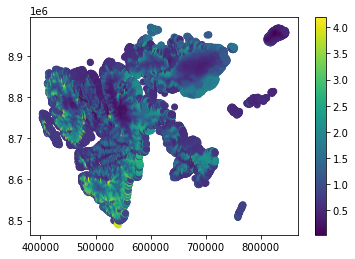

In [8]:
map_cmb = plt.scatter(df_runoff.X, df_runoff.Y, c=df_runoff.Runoff)
plt.colorbar(map_cmb)

# Interpolate the data that it fits to the centerline coordinates

In [9]:
df_runoff

,X,Y,Runoff
11847,403490,8747290,0.665358
11848,403490,8748290,0.729583
11849,403490,8749290,0.778592
11850,403490,8750290,0.913370
11851,403490,8751290,0.787866
...,...,...,...
254611,844490,8961290,0.511356
254612,844490,8962290,0.520604
255156,845490,8956290,0.466077
255157,845490,8957290,0.444423


In [10]:
df_bed_surf_thick_slope = pd.read_csv('/home/colili/Documents/PhD/project_john/DataFrame_produced/df_bed_surf_elev.csv')
df_bed_surf_thick_slope.head()

/usr/lib/python3.8/site-packages/IPython/core/interactiveshell.py:3062: DtypeWarning: Columns (22,23) have mixed types. Specify dtype option on import or set low_memory=False.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,


,Unnamed: 0,rgiid,x,y,Surge,BgnDate,EndDate,CenLon,CenLat,Area,...,Connect,Form,TermType,Linkages,Name,check_geom,geometry,bed,thickness,surface_elevation
0,0,RGI60-07.00001,552858.197838,8.514877e+06,0,20080901,-9999999,17.0347,76.7052,0.597,...,0,0,0,9,NaN,NaN,NaN,401.83295,4.16705,406.0
1,1,RGI60-07.00001,552837.209663,8.514876e+06,0,20080901,-9999999,17.0347,76.7052,0.597,...,0,0,0,9,NaN,NaN,NaN,401.83295,4.16705,406.0
2,2,RGI60-07.00001,552816.221488,8.514875e+06,0,20080901,-9999999,17.0347,76.7052,0.597,...,0,0,0,9,NaN,NaN,NaN,401.83295,4.16705,406.0
3,3,RGI60-07.00001,552795.233313,8.514875e+06,0,20080901,-9999999,17.0347,76.7052,0.597,...,0,0,0,9,NaN,NaN,NaN,401.83295,4.16705,406.0
4,4,RGI60-07.00001,552774.245139,8.514874e+06,0,20080901,-9999999,17.0347,76.7052,0.597,...,0,0,0,9,NaN,NaN,NaN,401.83295,4.16705,406.0


In [11]:
x = df_runoff.X.values.flatten()
y = df_runoff.Y.values.flatten()

In [12]:
XY = np.vstack((x,y)).T
XY.shape

(60570, 2)

In [13]:
x_center = df_bed_surf_thick_slope.x.values.flatten()
y_center = df_bed_surf_thick_slope.y.values.flatten()
x_center

array([ 552858.19783848,  552837.20966276,  552816.2214876 , ...,
       -329083.20303324, -329090.93954087, -329098.67604287])

In [14]:
runoff = df_runoff.Runoff.values.flatten()

In [15]:
from scipy import interpolate
df_bed_surf_thick_slope['Runoff'] = interpolate.griddata(XY, runoff, (x_center, y_center), method='linear')

In [16]:
df_bed_surf_thick_slope.to_csv('/home/colili/Documents/PhD/project_john/DataFrame_produced/df_bed_surf_thick_slope_runoff.csv')